# Free Fall 6 - Stephen Fegan - 2017-09-08

Copyright 2017, Stephen Fegan <sfegan@llr.in2p3.fr>  
LLR, Ecole polytechnique, CNRS/IN2P3, Universite Paris-Saclay  
This work is licensed under the CC AT-NC-SA 4.0 license - see LICENSE.md

#### This example shows :

- free fall in constant gravity field with acceleration "g" close to Earth 
- with air resistance that depends on square of speed
- and resistance coefficient "mu" that varies with air density,
- decreasing expenentially from "mu0" with height in the atmospehere
- with scale height "Hs" (8.5km)
- and assuming the sky diver opens a parachute at height 1000 meter altitude
- which changes resistance coefficient from "m0_person" to "mu0_parachute: 
- from release at fixed height "h0" until ground level is reached
- computing acceleration, speed and distance travelled as function of time

This example illustrates how "terminal velocity" is higher in the less dense air at high altitude. 
The sky-diver therefore accelerates initially and then slows down again as they get closer to the ground
with an abrupt change in velocity at 1000m when the parachute deploys. The acceleation plot shows 
that the decelleration at this point is 400m/s/s (i.e. 40 times the acceleration of gravity - commonly 
known as "40 Gs") which would kill the parachutist and destroy the parachute.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
g = 9.8 # m/s^2
h0 = 10000 # 10 km
mu0_person = 0.0035 # Person in free fall
mu0_parachute = 0.153 # Parachute
Hs = 8500

In [3]:
t = 0
x = 0
v = 0
dt = 0.001
h = h0 - x
all_a = []
all_v = []
all_x = []
all_t = []
while h>0:
    if(h>1000):
        mu0 = mu0_person
    else:
        mu0 = mu0_parachute
    mu = mu0 * exp(-h/Hs)
    a = g - mu*v**2
    t = t + dt
    v = v + a*dt
    x = x + v*dt
    h = h0 - x
    all_t.append(t)
    all_a.append(a)
    all_v.append(v)
    all_x.append(x)

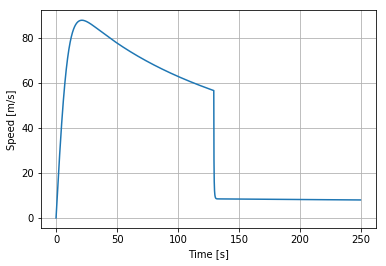

In [4]:
plot(all_t, all_v)
xlabel('Time [s]')
ylabel('Speed [m/s]')
grid()

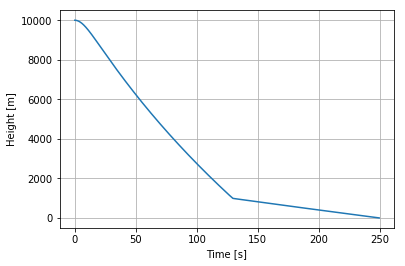

In [5]:
plot(all_t, h0-asarray(all_x))
xlabel('Time [s]')
ylabel('Height [m]')
grid()

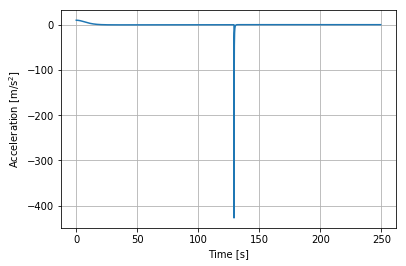

In [6]:
plot(all_t, all_a)
xlabel('Time [s]')
ylabel('Acceleration [m/s$^2$]')
grid()